**get model coordinates**

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/met_ model/distan_lat42.58lon-8.8046p3R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

**get station and sample max gust hour before**

In [ ]:
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/station_data/station.csv", usecols = ["time","gust_o"],parse_dates=["time"]).set_index("time")
print("raw data\n",station.head(24))

#show duplicated
df_duplicate = station[station.index.duplicated()]
print("duplicated")
print(df_duplicate)

#delete duplicated and resample
station = station[~station.index.duplicated(keep='first')]
station = station.resample("H",label="right",closed="right").max()

print("Max gust hour before")
print(station.head(4))
print("Variable statistics")
print(station.describe())

raw data
                         gust_o
time                          
2018-01-01 00:10:00   6.666672
2018-01-01 00:20:00   6.138894
2018-01-01 00:30:00   7.472228
2018-01-01 00:40:00   6.833339
2018-01-01 00:50:00   7.333339
2018-01-01 01:00:00   8.527785
2018-01-01 01:10:00   9.138896
2018-01-01 01:20:00   8.000006
2018-01-01 01:30:00   8.777785
2018-01-01 01:40:00   9.222230
2018-01-01 01:50:00   8.361118
2018-01-01 02:00:00   8.583340
2018-01-01 02:10:00   9.583341
2018-01-01 02:20:00   9.222230
2018-01-01 02:30:00   8.638896
2018-01-01 02:40:00   9.694452
2018-01-01 02:50:00   8.638896
2018-01-01 03:00:00   8.472229
2018-01-01 03:10:00   8.055562
2018-01-01 03:20:00   8.250007
2018-01-01 03:30:00  11.416676
2018-01-01 03:40:00  12.583343
2018-01-01 03:50:00   9.055563
2018-01-01 04:00:00  10.916675
duplicated
                        gust_o
time                          
2018-03-25 03:00:00   2.527780
2018-03-25 03:10:00   6.166672
2018-03-25 03:20:00   6.222227
2018-03-25 03:30:0

**get meteorologic model d0**

In [ ]:
#ria forecast d0
met_model = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Coron/met_ model/lat42.58lon-8.8046p3R4KmD0.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
met_model.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42021 entries, 2018-01-01 01:00:00 to 2023-01-01 23:00:00
Data columns (total 75 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dir0         42021 non-null  float64
 1   snow_prec0   42021 non-null  float64
 2   snowlevel0   42021 non-null  float64
 3   mod0         42021 non-null  float64
 4   wind_gust0   42021 non-null  float64
 5   mslp0        42021 non-null  float64
 6   temp0        42021 non-null  float64
 7   rh0          42021 non-null  float64
 8   visibility0  42021 non-null  float64
 9   lhflx0       42021 non-null  float64
 10  lwflx0       42021 non-null  float64
 11  conv_prec0   42021 non-null  float64
 12  prec0        42021 non-null  float64
 13  swflx0       42021 non-null  float64
 14  shflx0       42021 non-null  float64
 15  cape0        42021 non-null  float64
 16  cin0         42021 non-null  float64
 17  cfh0         42021 non-null  float64
 18  cfl0       

**Concatenate and dropnan**

In [ ]:
df_all = pd.concat([station,met_model],axis=1).dropna()
df_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41378 entries, 2018-01-01 01:00:00 to 2022-12-30 23:00:00
Data columns (total 76 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gust_o       41378 non-null  float64
 1   dir0         41378 non-null  float64
 2   snow_prec0   41378 non-null  float64
 3   snowlevel0   41378 non-null  float64
 4   mod0         41378 non-null  float64
 5   wind_gust0   41378 non-null  float64
 6   mslp0        41378 non-null  float64
 7   temp0        41378 non-null  float64
 8   rh0          41378 non-null  float64
 9   visibility0  41378 non-null  float64
 10  lhflx0       41378 non-null  float64
 11  lwflx0       41378 non-null  float64
 12  conv_prec0   41378 non-null  float64
 13  prec0        41378 non-null  float64
 14  swflx0       41378 non-null  float64
 15  shflx0       41378 non-null  float64
 16  cape0        41378 non-null  float64
 17  cin0         41378 non-null  float64
 18  cfh0       

**best correlation**

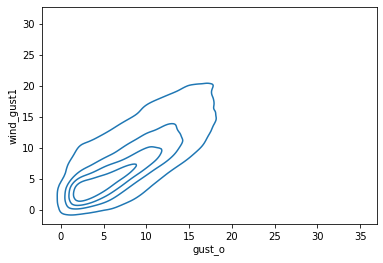

In [ ]:
import plotly.graph_objs as go
import seaborn as sns

#print(df_all.corr()["gust_o"].sort_values(ascending=False).head(10))


fig = go.Figure(go.Histogram2d(x=df_all['gust_o'], y=df_all['wind_gust1'], nbinsx=20, nbinsy=20, ))
fig.show()

sns.kdeplot(x=df_all.gust_o, y=df_all.wind_gust1,levels=5);

**Mean absolute error in m/s**

In [ ]:
from sklearn.metrics import mean_absolute_error
import plotly.express as px

print("mean absolute error mod0:", round(mean_absolute_error(df_all.gust_o, df_all.mod0),2))
print("mean absolute error wg1:", round(mean_absolute_error(df_all.gust_o, df_all.wind_gust1),2))
print("mean absolute error wg0:", round(mean_absolute_error(df_all.gust_o, df_all.wind_gust0),2))
print("mean absolute error wg2:", round(mean_absolute_error(df_all.gust_o, df_all.wind_gust2),2))
print("mean absolute error mod1:", round(mean_absolute_error(df_all.gust_o, df_all.mod1),2))

diff =  df_all["wind_gust1"]-df_all["gust_o"]
print("\nDifferences wind gust1 and gust observed")
print(diff.describe())
print("\nDifferences")
fig = px.line(diff)
fig.show()


mean absolute error mod0: 3.53
mean absolute error wg1: 2.26
mean absolute error wg0: 2.34
mean absolute error wg2: 2.33
mean absolute error mod1: 2.99

Differences wind gust1 and gust observed
count    41378.000000
mean        -0.125539
std          2.918776
min        -18.637157
25%         -2.023935
50%         -0.307581
75%          1.595584
max         17.278170
dtype: float64

Differences


**LGBMRegressor**

In [ ]:
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split

#numpy randomseed
np.random.seed(1)

# target variable
Y = df_all.gust_o
X = df_all[["wind_gust0","mod0","wind_gust1","mod1","wind_gust2","mod2","prec0"]]

MAE = []
for t in range (0,20):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )
  ml_model = LGBMRegressor(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  MAE.append(round(mean_absolute_error(y_test,y_pred),2))
  print("machine learning number:",t)
  df = pd.DataFrame({"y_test":y_test},index=y_test.index)
  df["y_pred"] = y_pred
  df["diff"] = df["y_pred"]-df["y_test"]
  print(df.describe())
print("\nDifferences last machine learning model")
fig = px.line(df["diff"].sort_index())
fig.show()  
print("Mean absolute value all machine learning models")
df_r=pd.DataFrame({"MAE":MAE,});
df_r.describe()


machine learning number: 0
            y_test       y_pred         diff
count  4138.000000  4138.000000  4138.000000
mean      7.608573     7.601375    -0.007198
std       4.331593     3.644049     2.348083
min       0.000000     2.234792   -15.126432
25%       4.000003     4.414365    -1.404782
50%       7.083339     7.062602     0.045067
75%      10.611120    10.158569     1.405606
max      29.250023    20.443724     8.190784
machine learning number: 1
            y_test       y_pred         diff
count  4138.000000  4138.000000  4138.000000
mean      7.695867     7.631590    -0.064277
std       4.379418     3.743553     2.325087
min       0.000000     2.365240   -13.703889
25%       4.111114     4.336465    -1.463768
50%       7.222228     7.085485     0.009662
75%      10.916675    10.151082     1.366522
max      31.027803    22.816208    13.593717
machine learning number: 2
            y_test       y_pred         diff
count  4138.000000  4138.000000  4138.000000
mean      7.630484 

Mean absolute value all machine learning models


,MAE
count,20.000000
mean,1.794500
std,0.026651
min,1.750000
25%,1.780000
50%,1.790000
75%,1.805000
max,1.840000


**Shapiro test normality MAE samples tested**

In [ ]:
from scipy.stats import shapiro

sta, p = shapiro(MAE)
print("\np value:",p)
print("significance level alpha=0.01")

alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable MAE in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable MAE no normal distribution in samples")  


p value: 0.25124937295913696
significance level alpha=0.01
Accept null hypothesis: normal distribution variable MAE in the samples


**T test (1sample) compare machine learning mean absolute error in a sample (n=20) versus meteorological model mean absolute error at point 1  (wind_gust1 =2.26). The alternative hypothesis is: the sample mean absolute error of  the sample is less than the given population mean absolute error (popmean). Significance level (alpha) = 0.01**

In [ ]:
from scipy import stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(MAE, popmean=2.26, alternative="less")

print("MAE in test sample:",MAE)
if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0: Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1")
    print("\nwe are accepting alternative hypothesis: Mean Absolute Error machine learning is less than Mean Absolute Error meteorological model wind_gust1")
else:
    print("\nwe are accepting null hypothesis:  H0:  Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1")

MAE in test sample: [1.79, 1.78, 1.78, 1.83, 1.75, 1.79, 1.8, 1.8, 1.8, 1.82, 1.77, 1.75, 1.78, 1.83, 1.79, 1.77, 1.84, 1.84, 1.78, 1.8]

we are rejecting null hypothesis  H0: Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1

we are accepting alternative hypothesis: Mean Absolute Error machine learning is less than Mean Absolute Error meteorological model wind_gust1


**Add time variables**

In [ ]:

df_all["hour"] = df_all.index.hour
df_all["month"] = df_all.index.month
df_all["dayofyear"] = df_all.index.dayofyear
df_all["weekofyear"] = df_all.index.isocalendar().week.astype(int)

#numpy randomseed
np.random.seed(1)

# target variable
Y = df_all.gust_o
X = df_all[["wind_gust0","mod0","wind_gust1","mod1","wind_gust2","mod2","hour",
            "month","dayofyear","weekofyear"]]

MAE_t = []
for t in range (0,20):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )
  ml_model = LGBMRegressor(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  MAE_t.append(round(mean_absolute_error(y_test,y_pred),2))
  print("machine learning number:",t)
  df = pd.DataFrame({"y_test":y_test},index=y_test.index)
  df["y_pred"] = y_pred
  df["diff"] = df["y_pred"]-df["y_test"]
  print(df.describe())
print("\nDifferences last machine learning model")
fig = px.line(df["diff"].sort_index())
fig.show()  
print("Mean absolute value all machine learning models")
df_r=pd.DataFrame({"MAE_t":MAE_t,});
df_r.describe()



machine learning number: 0
            y_test       y_pred         diff
count  4138.000000  4138.000000  4138.000000
mean      7.608573     7.606267    -0.002306
std       4.331593     3.690033     2.240833
min       0.000000     1.696578   -17.277865
25%       4.000003     4.476193    -1.310410
50%       7.083339     7.034013     0.065255
75%      10.611120    10.239445     1.361429
max      29.250023    20.352170     9.050920
machine learning number: 1
            y_test       y_pred         diff
count  4138.000000  4138.000000  4138.000000
mean      7.695867     7.642422    -0.053445
std       4.379418     3.787153     2.208675
min       0.000000     1.780761   -14.981344
25%       4.111114     4.371410    -1.331769
50%       7.222228     7.074210     0.021829
75%      10.916675    10.308680     1.319385
max      31.027803    22.824506    10.837461
machine learning number: 2
            y_test       y_pred         diff
count  4138.000000  4138.000000  4138.000000
mean      7.630484 

Mean absolute value all machine learning models


,MAE_t
count,20.00000
mean,1.69300
std,0.02697
min,1.64000
25%,1.68000
50%,1.69000
75%,1.71000
max,1.74000


**T test two related samples. This is a test for the null hypothesis that two related samples have identical mean absolute error. Alternative hypothesis the  mean absolute error from the sample with time variables is less than the mean absolute error of from the sample with time variables. Significance level (alpha) = 0.01**

In [ ]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(MAE, MAE_t, alternative="greater")

print("\nMAE without time variables:", np.round(MAE,3))
print("\nMAE with time variables:", np.round(MAE_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: MAE machine learning without time variables = MAE machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the MAE of the sample with time variables inputs is less than MAE of the sample without time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: MAE machine learning without time variables = MAE machine learning with time variables")


MAE without time variables: [1.79 1.78 1.78 1.83 1.75 1.79 1.8  1.8  1.8  1.82 1.77 1.75 1.78 1.83
 1.79 1.77 1.84 1.84 1.78 1.8 ]

MAE with time variables: [1.69 1.68 1.69 1.71 1.65 1.69 1.71 1.7  1.7  1.73 1.67 1.64 1.66 1.73
 1.69 1.68 1.74 1.73 1.69 1.68]

alpha:  0.01

p_value point:  3.070656415806968e-21

we are rejecting null hypothesis  H0: MAE machine learning without time variables = MAE machine learning with time variables

we are accepting alternative hypothesis: the MAE of the sample with time variables inputs is less than MAE of the sample without time variables inputs


**Save algorithm**

In [ ]:
import pickle
from sklearn.pipeline import Pipeline


estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/Coron/algorithms/gust_coron_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMRegressor(n_estimators=200))])
